# Trabalho Final Visão Computaional

## Deep Learning para classificação de doenças oculares

Integrantes:

Arthur Tavares Lindolpho

Cauã Gomes de Freitas

Estevão dos Santos Mello

Guilherme Alves

Nicolas Ouverney

Marcelo Angelo

Pedro Lannes

# VGG19

✅ GPU Configurada com crescimento de memória! Quantidade: 1
Consegui acessar o df
Carregando as imagens...
Sementes que serão utilizadas: [32, 42, 120, 240, 138]

--- Starting Run 1/5 [Seed: 32] ---
Dados divididos usando random_state=32
Training model for Run 1...
Epoch 1/50
140/140 [==============================] - 51s 326ms/step - loss: 1.3739 - accuracy: 0.2783 - val_loss: 1.3474 - val_accuracy: 0.3504
Epoch 2/50
140/140 [==============================] - 43s 308ms/step - loss: 1.2963 - accuracy: 0.3825 - val_loss: 1.1938 - val_accuracy: 0.4322
Epoch 3/50
140/140 [==============================] - 43s 309ms/step - loss: 1.1285 - accuracy: 0.4847 - val_loss: 1.0586 - val_accuracy: 0.5157
Epoch 4/50
140/140 [==============================] - 43s 311ms/step - loss: 1.0333 - accuracy: 0.5283 - val_loss: 1.0116 - val_accuracy: 0.5490
Epoch 5/50
140/140 [==============================] - 43s 311ms/step - loss: 0.9875 - accuracy: 0.5573 - val_loss: 0.9426 - val_accuracy: 0.5840
Epoch 6/5

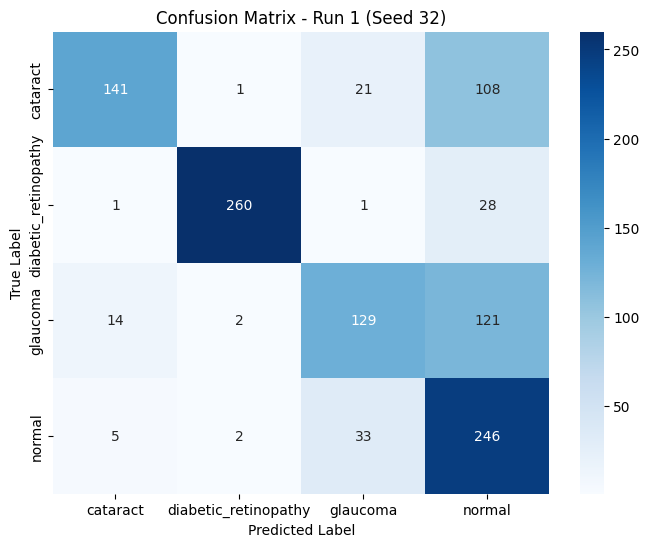

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 1

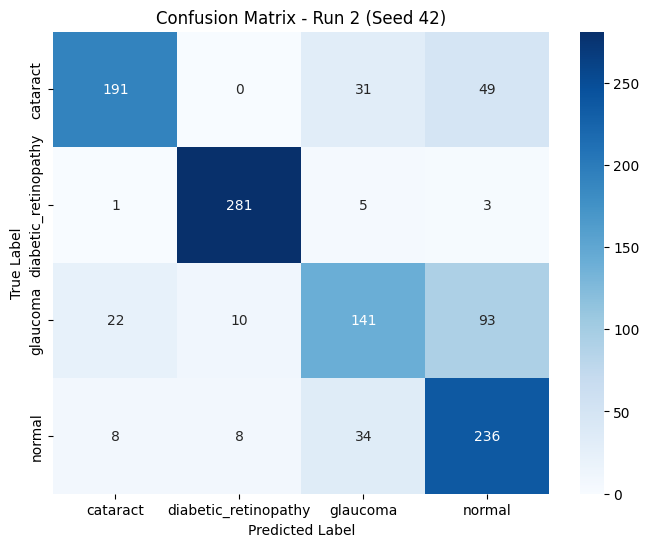

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 1

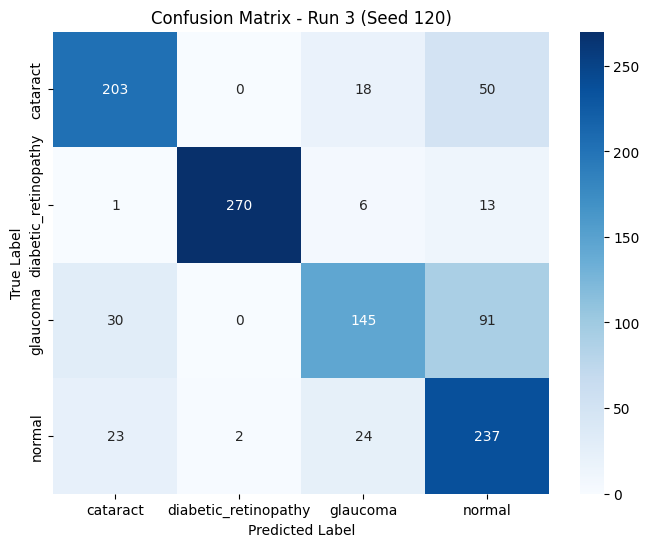

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 1

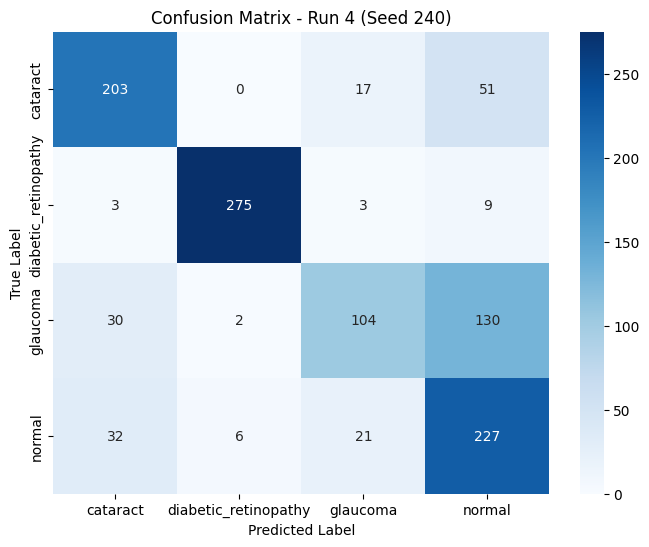

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 1

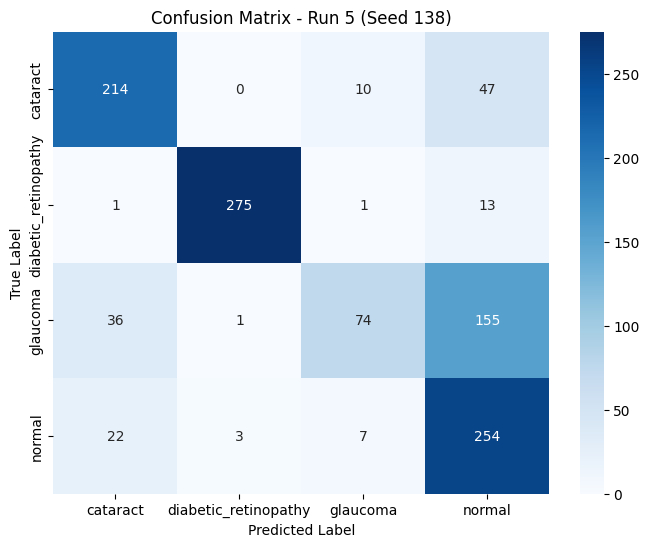

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 1

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models
import gc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import tensorflow as tf

# --- GPU SETUP ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ GPU Configurada com crescimento de memória! Quantidade: {len(gpus)}")
    except RuntimeError as e:
        print(f"Erro ao configurar GPU: {e}")
else:
    print("❌ GPU não detectada. O código rodará na CPU.")
# -----------------

# Redefine the dataset path
eye_diseases_classification_df = r'dataset processed'
print('Consegui acessar o df')

IMG_HEIGHT = 224
IMG_WIDTH = 224

class_names = sorted(os.listdir(eye_diseases_classification_df))
num_classes = len(class_names)
class_to_idx = {name: i for i, name in enumerate(class_names)}

X_features = []
y_labels = []

print("Carregando as imagens...")
for class_name in class_names:
    class_path = os.path.join(eye_diseases_classification_df, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
            img_array = img_to_array(img) 
            X_features.append(img_array)
            y_labels.append(class_to_idx[class_name])
        except Exception as e:
            print(f"Erro ao carregar a imagem {img_path}: {e}")

X_features = np.array(X_features)
y_labels = np.array(y_labels)

# Normaliza as features
X_features_normalized = X_features / 255.0

# Limpa memória RAM da lista bruta, mantemos apenas a normalizada para fazer o split no loop
del X_features
gc.collect()

accuracies = []
precisions = []
recalls = []
f1_scores = []

num_runs = 5
epochs_per_run = 50
batch_size = 32

# --- NOVIDADE: Geração de sementes aleatórias ---
# Gera 5 números inteiros aleatórios para servirem de semente
seeds = [32,42,120,240,138]
print(f"Sementes que serão utilizadas: {seeds}")
# -----------------------------------------------

for i in range(num_runs):
    current_seed = seeds[i]
    print(f"\n--- Starting Run {i+1}/{num_runs} [Seed: {current_seed}] ---")

    # --- MUDANÇA: Split dentro do loop ---
    # Agora o split acontece aqui dentro, usando a semente da vez
    train_images, test_images, train_labels, test_labels = train_test_split(
        X_features_normalized, y_labels, 
        test_size=0.2, 
        stratify=y_labels, 
        random_state=current_seed # Usa a semente da lista
    )
    print(f"Dados divididos usando random_state={current_seed}")
    # -------------------------------------

    # Limpeza de sessão Keras antes de criar novo modelo
    tf.keras.backend.clear_session()
    gc.collect()

    base_model = VGG19(weights=None, include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False 

    model = tf.keras.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        #layers.Dense(256, activation = 'relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(32, activation='relu'),
        #layers.Dense(16, activation = 'relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

    print(f"Training model for Run {i+1}...")
    history = model.fit(train_images, train_labels, epochs=epochs_per_run, batch_size=batch_size,
                        validation_data=(test_images, test_labels), verbose=1)

    print(f"Evaluating model for Run {i+1}...")
    
    # Batch size reduzido para evitar OOM na predição
    y_pred_probs = model.predict(test_images, batch_size=2) 
    
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate metrics
    acc = accuracy_score(test_labels, y_pred)
    prec = precision_score(test_labels, y_pred, average='weighted', zero_division=0)
    rec = recall_score(test_labels, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(test_labels, y_pred, average='weighted', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    print(f"Run {i+1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - Run {i+1} (Seed {current_seed})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print(model.summary())
    # --- LIMPEZA REFORÇADA ---
    # Como recriamos train_images/test_images a cada loop, precisamos deletá-los também
    del model, base_model, history, y_pred_probs, y_pred, cm
    del train_images, test_images, train_labels, test_labels
    tf.keras.backend.clear_session()
    gc.collect()
    # -------------------------

print("\n--- Overall Results ---")
print(f"Seeds Used: {seeds}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
print(f"Mean Precision: {np.mean(precisions):.4f} (+/- {np.std(precisions):.4f})")
print(f"Mean Recall: {np.mean(recalls):.4f} (+/- {np.std(recalls):.4f})")
print(f"Mean F1-score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")

## Código para o dataset dividido em train, test e val

✅ GPU Configurada! Quantidade: 1
Criando pipelines de dados (Streaming)...
Found 20236 files belonging to 11 classes.
Found 433 files belonging to 11 classes.
Found 1236 files belonging to 11 classes.
Classes encontradas: ['1.Dry AMD', '10.Glaucoma', '11.Normal Fundus', '2.Wet AMD', '3.Mild DR', '4.Moderate DR', '5.Severe DR', '6.Proliferate DR', '7.Cataract', '8.Hypertensive Retinopathy', '9.Pathological Myopia']

Sementes definidas: [32, 42, 60, 120, 240]

--- Starting Run 1/5 [Seed: 32] ---
Epoch 1/50
1265/1265 [==============================] - 210s 164ms/step - loss: 1.5957 - accuracy: 0.4151 - val_loss: 1.1701 - val_accuracy: 0.5312
Epoch 2/50
1265/1265 [==============================] - 276s 218ms/step - loss: 1.1480 - accuracy: 0.5403 - val_loss: 1.0881 - val_accuracy: 0.5335
Epoch 3/50
1265/1265 [==============================] - 334s 264ms/step - loss: 1.0622 - accuracy: 0.5665 - val_loss: 1.0387 - val_accuracy: 0.5497
Epoch 4/50
1265/1265 [==============================] - 3

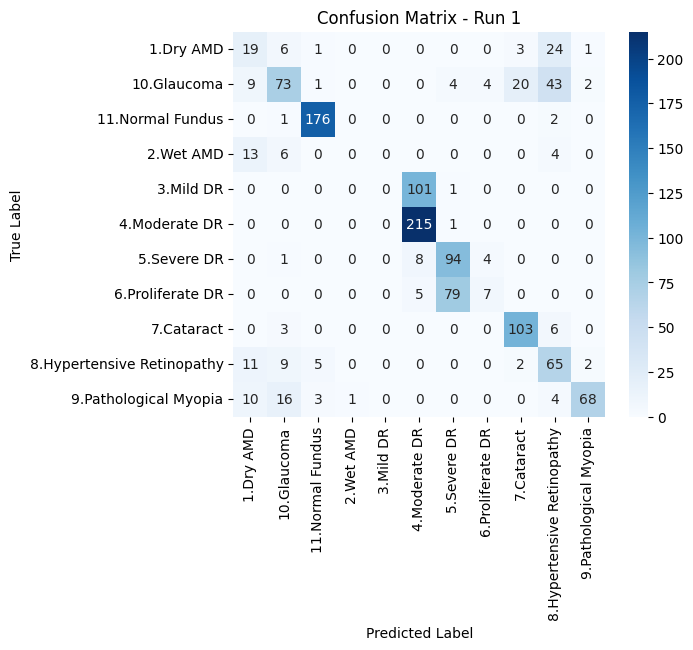


--- Starting Run 2/5 [Seed: 42] ---
Epoch 1/50
1265/1265 [==============================] - 250s 197ms/step - loss: 1.6669 - accuracy: 0.3935 - val_loss: 1.3035 - val_accuracy: 0.4988
Epoch 2/50
1265/1265 [==============================] - 257s 203ms/step - loss: 1.1969 - accuracy: 0.5238 - val_loss: 1.0842 - val_accuracy: 0.5358
Epoch 3/50
1265/1265 [==============================] - 270s 214ms/step - loss: 1.0818 - accuracy: 0.5639 - val_loss: 1.1112 - val_accuracy: 0.5612
Epoch 4/50
1265/1265 [==============================] - 296s 234ms/step - loss: 1.0307 - accuracy: 0.5773 - val_loss: 1.0268 - val_accuracy: 0.5681
Epoch 5/50
1265/1265 [==============================] - 292s 231ms/step - loss: 0.9739 - accuracy: 0.6017 - val_loss: 0.9962 - val_accuracy: 0.5658
Epoch 6/50
1265/1265 [==============================] - 248s 196ms/step - loss: 0.9435 - accuracy: 0.6056 - val_loss: 1.0019 - val_accuracy: 0.5566
Epoch 7/50
1265/1265 [==============================] - 284s 225ms/step - l

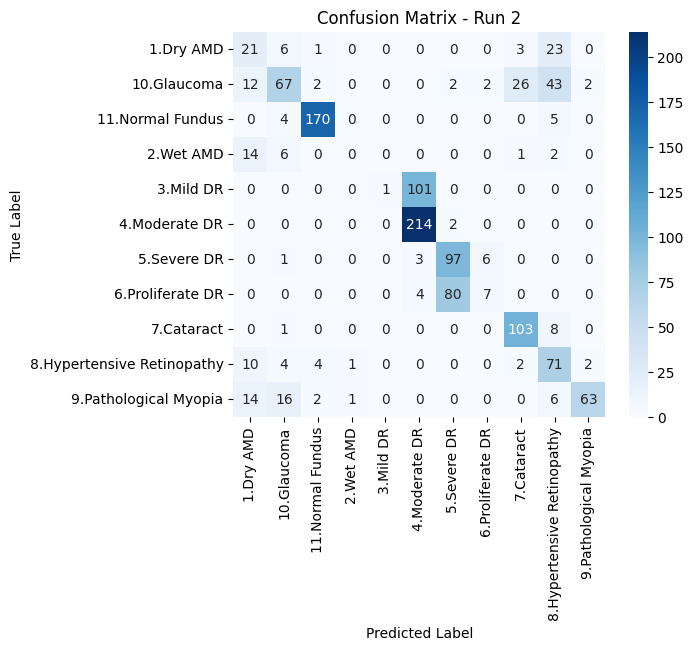


--- Starting Run 3/5 [Seed: 60] ---
Epoch 1/50
1265/1265 [==============================] - 278s 219ms/step - loss: 1.5815 - accuracy: 0.4107 - val_loss: 1.1554 - val_accuracy: 0.5242
Epoch 2/50
1265/1265 [==============================] - 264s 208ms/step - loss: 1.1473 - accuracy: 0.5388 - val_loss: 1.0288 - val_accuracy: 0.5635
Epoch 3/50
1265/1265 [==============================] - 257s 204ms/step - loss: 1.0650 - accuracy: 0.5681 - val_loss: 1.0030 - val_accuracy: 0.5704
Epoch 4/50
1265/1265 [==============================] - 280s 221ms/step - loss: 0.9988 - accuracy: 0.5896 - val_loss: 0.9880 - val_accuracy: 0.5727
Epoch 5/50
1265/1265 [==============================] - 265s 209ms/step - loss: 0.9611 - accuracy: 0.6018 - val_loss: 0.9951 - val_accuracy: 0.5751
Epoch 6/50
1265/1265 [==============================] - 205s 162ms/step - loss: 0.9356 - accuracy: 0.6086 - val_loss: 0.9604 - val_accuracy: 0.5612
Epoch 7/50
1265/1265 [==============================] - 178s 140ms/step - l

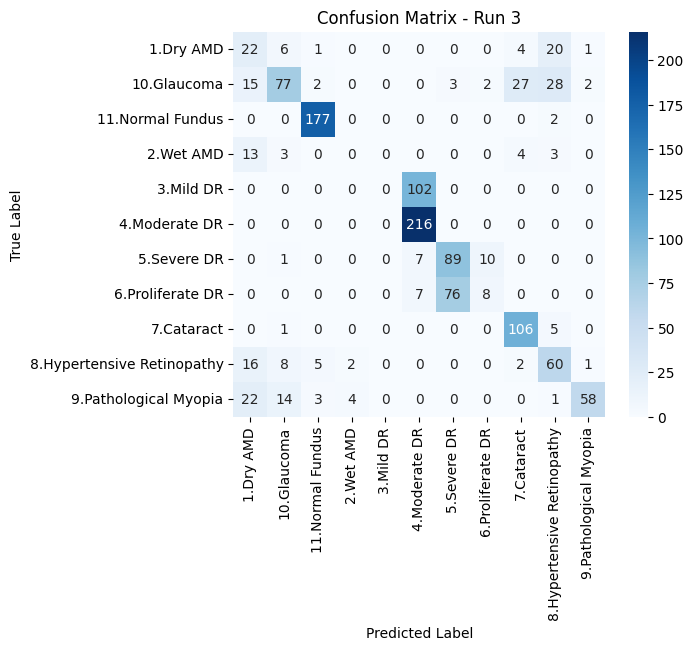


--- Starting Run 4/5 [Seed: 120] ---
Epoch 1/50
1265/1265 [==============================] - 274s 216ms/step - loss: 1.6319 - accuracy: 0.4102 - val_loss: 1.1971 - val_accuracy: 0.5450
Epoch 2/50
1265/1265 [==============================] - 257s 203ms/step - loss: 1.1766 - accuracy: 0.5325 - val_loss: 1.0785 - val_accuracy: 0.5358
Epoch 3/50
1265/1265 [==============================] - 241s 190ms/step - loss: 1.0651 - accuracy: 0.5710 - val_loss: 1.0483 - val_accuracy: 0.5427
Epoch 4/50
1265/1265 [==============================] - 238s 188ms/step - loss: 1.0018 - accuracy: 0.5946 - val_loss: 0.9794 - val_accuracy: 0.5635
Epoch 5/50
1265/1265 [==============================] - 200s 158ms/step - loss: 0.9524 - accuracy: 0.6145 - val_loss: 1.0228 - val_accuracy: 0.5751
Epoch 6/50
1265/1265 [==============================] - 171s 135ms/step - loss: 0.9247 - accuracy: 0.6194 - val_loss: 0.9907 - val_accuracy: 0.5589
Epoch 7/50
1265/1265 [==============================] - 276s 218ms/step - 

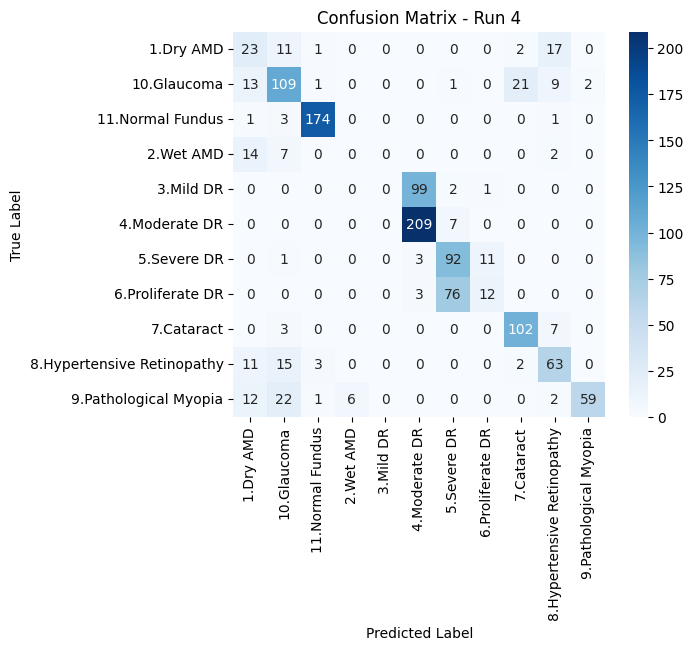


--- Starting Run 5/5 [Seed: 240] ---
Epoch 1/50
1265/1265 [==============================] - 229s 180ms/step - loss: 1.6593 - accuracy: 0.4010 - val_loss: 1.2434 - val_accuracy: 0.5058
Epoch 2/50
1265/1265 [==============================] - 302s 239ms/step - loss: 1.1967 - accuracy: 0.5292 - val_loss: 1.1236 - val_accuracy: 0.5081
Epoch 3/50
1265/1265 [==============================] - 292s 231ms/step - loss: 1.0884 - accuracy: 0.5620 - val_loss: 1.0303 - val_accuracy: 0.5497
Epoch 4/50
1265/1265 [==============================] - 272s 215ms/step - loss: 1.0259 - accuracy: 0.5849 - val_loss: 1.0096 - val_accuracy: 0.5612
Epoch 5/50
1265/1265 [==============================] - 270s 214ms/step - loss: 0.9792 - accuracy: 0.5977 - val_loss: 1.0069 - val_accuracy: 0.5681
Epoch 6/50
1265/1265 [==============================] - 177s 140ms/step - loss: 0.9506 - accuracy: 0.6070 - val_loss: 0.9957 - val_accuracy: 0.5797
Epoch 7/50
1265/1265 [==============================] - 177s 140ms/step - 

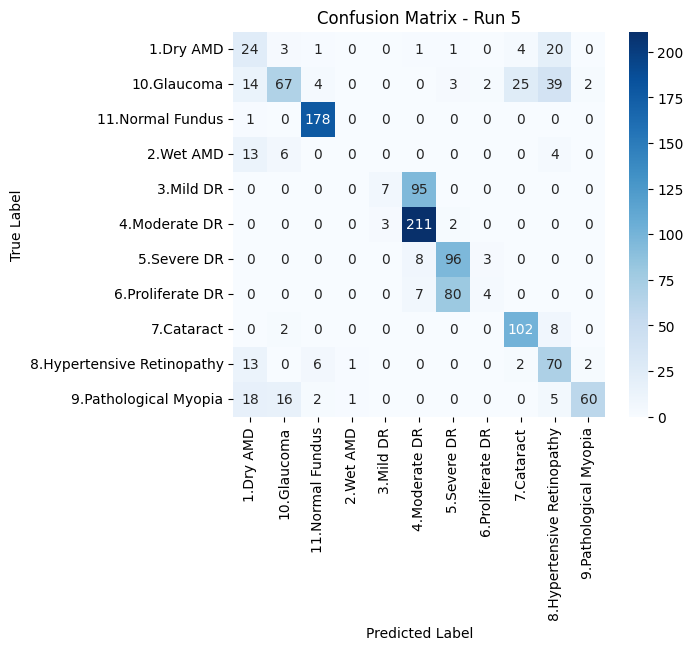


--- Overall Results ---
Mean Accuracy: 0.6649 (+/- 0.0089)
Mean Precision: 0.6420 (+/- 0.0340)
Mean Recall: 0.6649 (+/- 0.0089)
Mean F1-score: 0.6141 (+/- 0.0110)


In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models
import gc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import tensorflow as tf
import random

# --- CONFIGURAÇÃO DE GPU ---
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ GPU Configurada! Quantidade: {len(gpus)}")
    except RuntimeError as e:
        print(f"Erro ao configurar GPU: {e}")
else:
    print("❌ GPU não detectada.")

# --- CAMINHOS ---

base_dataset_dir = r'Retinal Fundus Images processed' 
train_dir = os.path.join(base_dataset_dir, 'train')
val_dir = os.path.join(base_dataset_dir, 'val') 
test_dir = os.path.join(base_dataset_dir, 'test')

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16 

print("Criando pipelines de dados (Streaming)...")
# --- CRIAÇÃO DOS DATASETS (STREAMING DO DISCO) ---

# shuffle=True para treino, shuffle=False para validação/teste (importante para ordem correta)

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False 
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False # IMPORTANTE: False para alinhar as predições com os rótulos reais depois
)

# Captura os nomes das classes diretamente do dataset
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Classes encontradas: {class_names}")

# Otimização de performance (Cache e Prefetch)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# --- LOOP DE TREINAMENTO ---
accuracies = []
precisions = []
recalls = []
f1_scores = []

num_runs = 5
epochs_per_run = 50
random_seeds = [32,42,60,120,240]

print(f"\nSementes definidas: {random_seeds}")

for i in range(num_runs):
    current_seed = random_seeds[i]
    print(f"\n--- Starting Run {i+1}/{num_runs} [Seed: {current_seed}] ---")

    # Reprodutibilidade
    os.environ['PYTHONHASHSEED'] = str(current_seed)
    random.seed(current_seed)
    np.random.seed(current_seed)
    tf.random.set_seed(current_seed)

    # Limpeza

    tf.keras.backend.clear_session()
    gc.collect()

    base_model = VGG19(weights=None, include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False 

    model = tf.keras.Sequential([
        layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)), # Normalização acontece aqui agora
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='elu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='elu'),
        layers.Dense(32, activation='elu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

    # Treinamento usando os Datasets
    history = model.fit(train_ds, epochs=epochs_per_run, validation_data=val_ds, verbose=1)
    
    print(f"Evaluating model for Run {i+1}...")

    # --- PREDIÇÃO E EXTRAÇÃO DE LABELS REAIS ---
    # Como estamos usando datasets, precisamos extrair os labels reais (y_true) iterando o dataset
    # e as predições (y_pred) usando model.predict
    y_true = np.concatenate([y for x, y in test_ds], axis=0)
    y_pred_probs = model.predict(test_ds)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Métricas
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

    print(f"Run {i+1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

    # Matriz de Confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - Run {i+1}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    del model, base_model, history, y_pred_probs, y_pred, y_true, cm
    tf.keras.backend.clear_session()
    gc.collect()

print("\n--- Overall Results ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
print(f"Mean Precision: {np.mean(precisions):.4f} (+/- {np.std(precisions):.4f})")
print(f"Mean Recall: {np.mean(recalls):.4f} (+/- {np.std(recalls):.4f})")
print(f"Mean F1-score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")

